# Python for Data Analysis

Book:
http://wesmckinney.com/pages/book.html

GitHub:
https://github.com/wesm/pydata-book

## 0. Terminology

* Time series: a series of data points listed in time order
* Data munging/wrangling/munge: transforming messy data into a structured format for processing

## 1. Libraries Overview

* NumPy
    * `ndarray` -- fast multidimensional array
    * C interop
    * Linear algebra operations
    * More efficient arrays
    
    
* pandas
    * High-level data structures for working with structured data
    * In particular `DataFrame` and `Series`
    
    
* matplotlib
    * Produces plots and other 2D data visulizations
    
    
* scipi
    * Various scientific computing functions
    * E.g., statistical tests, etc.
    
    
* scikit-learn
    * General-purpose machine learning
    
    
* statsmodels
    * Classical statistics and econometric algorithms
    


## 2. Import conventions
It's bad practice to import everything, like:
`from numpy import *`

This will take in a huge package (snigger).

Instead, the following import conventions are used:

    * `import numpy as np`
    * `import matplotlib.pyplot as plt`
    * `import pandas as pd`
    * `import seaborn as sns`
    * `import statsmodel as sm`
    
This allows you to call, say, `np.arange`, so you can clearly see `.arange` is coming from the `np` package.

## 3. Python Reminder/Tips
This section just contains some points that weren't covered in the previous Python tutorial.

### 3.1 Object Introspection

In [39]:
# Use ? to find out information about an object,
# or to show a function's docstring

my_list = [1, 2, 3]

my_list?

my_list.insert?

### 3.2 %run/%load
Use %run or %load (Jupyter) to run a .py script.

In [10]:
# %run test_script.py

# %load test_script.py

### 3.3 Magic Commands
Magic commands are special IPython commands not available in Python itself.

They are prefixed by %.

E.g., `%timeit`

You can use ? with these commands too.

Use the following to get a list of magic commands:

`%quickref`
`%magic`

In [15]:
# Enter debugger
%debug?

# Delete all defined variables/names
%reset

# Pretty-print the object and display it via pager
%page OBJECT

# Delete a variable and attempt to clear al references to it
%xdel VARIABLE

# Let's you see matplotlibs in Jupyter
%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? n
Nothing done.
Object `OBJECT` not found
NameError: name 'VARIABLE' is not defined
Using matplotlib backend: MacOSX


ERROR:tornado.application:Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x10e7e2f28>)
Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 605, in _run_callback
    ret = callback()
  File "/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 265, in enter_eventloop
    self.eventloop(self)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/eventloops.py", line 277, in loop_cocoa
    show.mainloop()
AttributeError: 'function' object has no attribute 'mainloop'


### 3.4 matplotlib in Jupyter

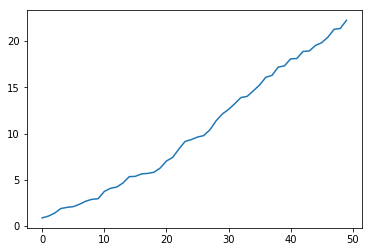

In [17]:
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(np.random.rand(50).cumsum())

### 3.5 Keyword Arguments
Functions can take keyword arguments.

In [22]:
def my_func(x, y, z):
    print("x is {}, y is {}, and z is {}".format(x, y, z))
    
my_func(x=3, z=10, y = 2)

x is 3, y is 2, and z is 10


### 3.6 Binding
Assigning is sometimes referred to as __binding__, and variables that have been assigned may be referred to as __bound variables__.

### 3.7 Checking conformity
As well as using isinstance, you can define a function to check if something implements a certain protocol, throwing an error if it does not.

In [26]:
def isiterable(obj):
    try:
        iter(obj)
        return True
    except TypeError:
        return False

x = 5

if not isinstance(x, list) and isiterable(x):
    x = list(x)
    
print(x)

5


### 3.8 Scalar Value Types
I.e., primitive types

* None
* str
* bytes
* float
* bool
* int

### 3.9 Interpret characters as-is
Use r before the string. (I.e., don't interpret the characters as escape characters.) Like @ in C#.

In [28]:
my_str = r"this string\does not contain\special characters."

print(my_str)

this string\does not contain\special characters.


### 3.10 Printing readable date strings
Use `.strftime(...)`.

In [33]:
from datetime import datetime, date, time

dt = datetime(2017, 1, 21, 20, 30, 21)
dt.strftime('%m/%d/%y %H:%M')

'01/21/17 20:30'

### 3.12 Extracting variables
When unpacking variables, you can use the `*rest` keyword to get the remaining arguments. Note, rest here is just an example and can be anything, such as an underscore (_).

In [35]:
my_list = 1, 2, 3, 4, 5

a, b, *rest = my_list

print(a, b)

print(rest)

1 2
[3, 4, 5]


### 3.13 Sort Keys

In [38]:
my_list = ["he", "ate", "a", "great", "hotdog"]

my_list.sort(key=len)

print(my_list)

['a', 'he', 'ate', 'great', 'hotdog']


### 3.14 Understanding nested comprehension
This is just a nice example.

In [3]:
some_tuples = ((1,2,3),(4,5,6),(7,8,9))

flattened = [x for tup in some_tuples for x in tup]

print(flattened)

# This is the same as:

flattened = []

for tup in some_tuples:
    for x in tup:
        flattened.append(x)
        
print(flattened)

[1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 2, 3, 4, 5, 6, 7, 8, 9]


### 3.15 Using a list of functions to clean strings 

In [8]:
import re

# Just another nice example
def remove_punctuation(str):
    return re.sub("[!#?]", "", str)
                  
                  
def clean_strings(strings, ops):
    result = []
    for value in strings:
        for function in ops:
            value = function(value)
        result.append(value)
    return result
                  
states = ["    alabama", "Georgia!", "West Virginia?  "]
clean_ops = [str.strip, remove_punctuation, str.title]              
    
clean_strings(states, clean_ops)

['Alabama', 'Georgia', 'West Virginia']

### 3.16 itertools
The `itertools` module has a collection for generators, such as groupby, combinations, etc. Similar to LINQ statements in C#.

In [14]:
import itertools

first_letter = lambda x: x[0]

names = ["Adam", "Alan", "Jennifer", "Josie", "James"]

for letter, names in itertools.groupby(names, first_letter):
    print(letter, list(names)) # Names is a generator

('A', ['Adam', 'Alan'])
('J', ['Jennifer', 'Josie', 'James'])


## 2. NumPy Basics

A few points about NumPy:
    
* Data is stored in a contiguous block in memory
* NumPy's algorithms written in C can operate on this without type checking
* NumPy arrays use less memory than built-in Python sequences



In [3]:
# Here's a comparison

import numpy as np

np_array = np.arange(1000000)

python_list = list(range(1000000))


%time for _ in range(10): np_array2 = np_array * 2
    
%time for _ in range(10): python_list2 = [x * 2 for x in python_list]

Wall time: 26 ms
Wall time: 1.13 s


And numpy arrays use less memory too.

### 2.1 ndarray
ndarray is a fast, N-dimensional array object.
You can perform mathematical operations on the every element with similar syntax to that you would use with scalar elements (e.g., above where we could just do `array * 2` to multiply every element in the array by 2, instead of needing a for composition).

Every element in ndarray must be of the same type.

In [4]:
# Here is a 2 by 3 array with random data.

import numpy as np

random_two_by_three = np.random.randn(2, 3)

random_two_by_three

array([[ 1.47636454,  0.58560396,  0.08390403],
       [ 1.39940735, -0.60260737,  0.85310421]])

In [7]:
# I can then multiply every element by 10
random_two_by_three * 10

array([[ 14.76364544,   5.85603959,   0.83904029],
       [ 13.99407348,  -6.02607369,   8.53104209]])

In [8]:
# Or add it with something else, like itself
random_two_by_three + random_two_by_three

array([[ 2.95272909,  1.17120792,  0.16780806],
       [ 2.7988147 , -1.20521474,  1.70620842]])

In [16]:
# Use shape to get the rows/columns of the array
print(random_two_by_three.shape)

# Use ndim to get the dimensions
print(random_two_by_three.ndim)

# And use dtype to get the data type stored in the array
print(random_two_by_three.dtype)

(2L, 3L)
2
float64


#### 2.1.1 Creating ndarrays

In [13]:
# 1. Use the array function
my_data = [1, 2, 3, 4, 5]

my_np_arr = np.array(my_data)

my_np_arr

array([1, 2, 3, 4, 5])

In [15]:
# 2. Nested sequences will be converted into multidimensional arrays
nested_sequence = [[1, 2, 3], [4, 5, 6]]

np_arr = np.array(nested_sequence)

np_arr

array([[1, 2, 3],
       [4, 5, 6]])

In [35]:
# 3. Use other functions like zeros, one, or empty to create arrays with these default values.
#    Pass in tuples with dimensions as arguments.
multi_dim_zero_array = np.zeros((3, 3))

print(multi_dim_zero_array)

identity = np.identity(3) # Note, just a single argument

print(identity)

[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


In [23]:
# 4. arange is like Python's range function, but it passes back an np array instead of a list
aranged_arr = np.arange(10)

aranged_arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [36]:
# 5. "like" functions create an ndarray with the same shape and type
nested_sequence = [[1, 2, 3], [4, 5, 6]]
np_arr = np.array(nested_sequence)

print(np_arr)

like_arr = np.ones_like(np_arr)

print(like_arr)

[[1 2 3]
 [4 5 6]]
[[1 1 1]
 [1 1 1]]


In [39]:
# 6. Fill an array FULL of values
filled_arr = np.full((2, 3), 6)

filled_arr

array([[6, 6, 6],
       [6, 6, 6]])

#### 2.1.2 ndarray data types

In [42]:
# 1. Cast an array of strings to floats
number_strings = np.array(["2.64", "1.43", "5.6"], dtype=np.string_)

float_arr = number_strings.astype(float)

float_arr

array([ 2.64,  1.43,  5.6 ])

#### 2.1.3 NumPy array arithmetic
You can perform arithmetic operations on arrays without writing for loops.

In NumPy, this is called __vectorization__.

In [46]:
arr = np.array([[1, 2, 3,], [4, 5, 6]])

arr

array([[1, 2, 3],
       [4, 5, 6]])

In [49]:
arr * 3

array([[ 3,  6,  9],
       [12, 15, 18]])

In [50]:
arr + arr

array([[ 2,  4,  6],
       [ 8, 10, 12]])

In [51]:
arr * arr

array([[ 1,  4,  9],
       [16, 25, 36]])

In [53]:
1.0/arr

array([[ 1.        ,  0.5       ,  0.33333333],
       [ 0.25      ,  0.2       ,  0.16666667]])

In [54]:
arr ** 0.5

array([[ 1.        ,  1.41421356,  1.73205081],
       [ 2.        ,  2.23606798,  2.44948974]])

In [57]:
# You can also use Boolean operations, which will compare each element in the array
arr2 = np.array([[1, 5, 2], [2, 7, 9]])

arr2 < arr

array([[False, False,  True],
       [ True, False, False]], dtype=bool)

#### 2.1.4 Indexing and slicing
If you take a slice of an array and assign a scalar value to it, this is known as __broadcasting__. The value is __broadcasted__ to that slice.

In [59]:
# Broadcasting example
arr = np.arange(10)

arr[4:6] = 9

arr

array([0, 1, 2, 3, 9, 9, 6, 7, 8, 9])

Important difference:
When you take a slice of an ndarray, the slice refers to the original array elements.
The data is NOT copied.

This slice is known as a __view__.

In [69]:
arr = np.arange(10)

# Take a slice
my_slice = arr[0:5]

print(my_slice)

# Change the first element of my slice
my_slice[0] = 10

# The change is reflected in the original array
print(arr)

# Or we could change every value in this slice
my_slice[:] = 1

print(arr)

[0 1 2 3 4]
[10  1  2  3  4  5  6  7  8  9]
[1 1 1 1 1 5 6 7 8 9]


In [70]:
# But if you want, you CAN take a copy too.
my_slice = arr[8:10].copy()

my_slice[:] = 0

print(my_slice)
print(arr)

[0 0]
[1 1 1 1 1 5 6 7 8 9]


In [74]:
# 2D arrays can be accessed using the usual [][] syntax, or by commas
arr = np.array([[1, 2, 3], [4, 5, 6]])

print(arr)

print(arr[0][1]) # ==
print(arr[0, 1])

[[1 2 3]
 [4 5 6]]
2
2


In [79]:
# Note on multidimensional arrays.
# We can also get, say, 2 x 2 x 3 arrays. This means an 2 (2 by 3) arrays.
higher_dim_arr = np.array([[[1, 2, 3], [4, 5, 6]], [[3, 2, 1], [6, 5, 3]]])

print(higher_dim_arr)

# So calling just one index will get you the first array
print(higher_dim_arr[0])

# And you can assign values to just this
higher_dim_arr[0] = 1

print(higher_dim_arr)

[[[1 2 3]
  [4 5 6]]

 [[3 2 1]
  [6 5 3]]]
[[1 2 3]
 [4 5 6]]
[[[1 1 1]
  [1 1 1]]

 [[3 2 1]
  [6 5 3]]]


#### Slicing in 2D
Slicing in 2D is pretty logical. You just have to remember the syntax.

In [83]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

print(arr2d)

slice2d = arr2d[:2] # Take first 2 rows (up to row index at 2 -- the 3rd row)

print(slice2d)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 2 3]
 [4 5 6]]


In [90]:
# First arg = select all rows, second arg: select up to column 1
col1 = arr2d[:, :1]
print(col1)

# Take from row 1, up to col 2 (the third col)
sub_arr = arr2d[1:, :2]
print(sub_arr)

[[1]
 [4]
 [7]]
[[4 5]
 [7 8]]
